# Section 5: Basic probability and statistical analysis using SciPy
- A *probability mass function* maps inputted integer values to their probability of occurrence.
- the probability mass function for the binomial distribution can be generated by calling `stats.binom.pmf()`.
- *Mean* is a good measure of a dataset's centrality. It minimizes the *sum of squares* relative to the dataset. We can compute an unweighted mean by summing the values in a dataset and dividing by the number of values in the dataset. We can also compute a weighted mean by inputting a `weights` array into `np.average`. The weighted mean of the binomial distribution increases linearly with the coin-flip count.
- *Variance* is a good measure of a dataset's dispersion. It equals the average squared distance of the data points from the mean. The weighted variance of the binomial distribution increases linearly with the coin-flip count.
- The *standard deviation* is an alternative measure of dispersion. It equals the square root of the variance. The standard deviation maintains the units used in a dataset.

In [2]:
pip install scipy

104.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 12.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy import stats

In [8]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f'Probability of observing more than 15 heads or 15 tails is {prob}')

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625
0.01181793212890625


/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_72370/4268563943.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  prob = stats.binom_test(num_heads, num_flips, prob_head)


In [9]:
# Computing an exact probability using stats.binom.pmf
prob_16_heads = stats.binom.pmf(16, num_flips, prob_head)
print(f'Probability of observing {num_heads} of {num_flips} is {prob_16_heads}')

Probability of observing 16 of 20 is 0.004620552062988286


In [10]:
# Computing an array of probabilities using stats.binom.pmf
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

In [16]:
# Computing an interval probability using stats.binom.pmf
# Passing a range to stats.binom.pmf returns an array of probabilities across the interval of all possible head counts
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f'Total sum of probabilities equals {total_prob}')

Total sum of probabilities equals 1.0000000000000002


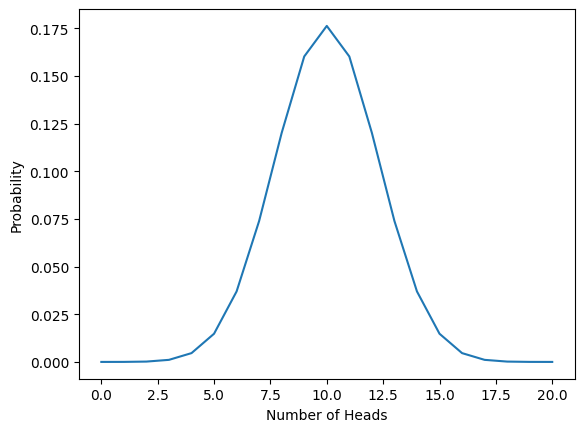

In [17]:
# Plotting a 20-coin-flip binomial distribution
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

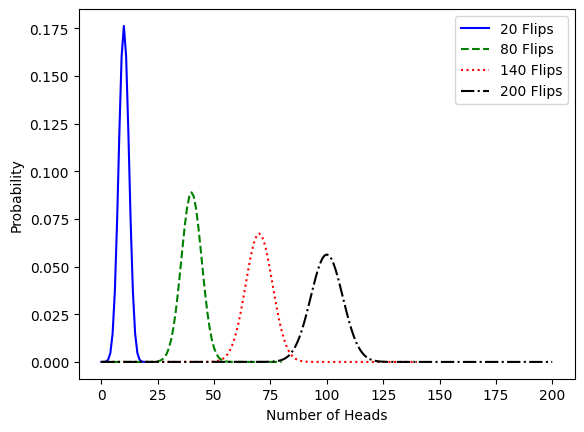

In [20]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', ':', '-.']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, prob_head)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f'{num_flips} Flips')
    
plt.legend()
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

## Mean as a measure of centrality

In [21]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

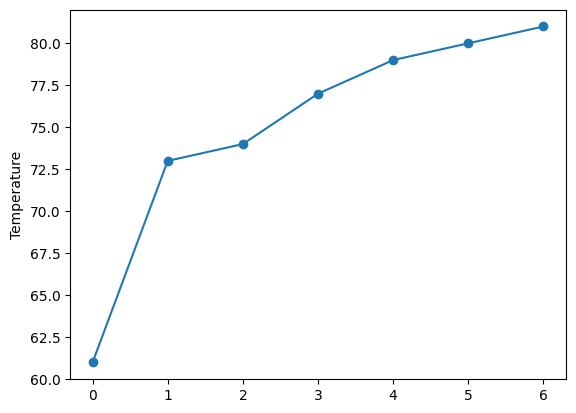

In [24]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [25]:
# Finding the midpoint temperature
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f'The midpoint temperature is {midpoint} degrees')

The midpoint temperature is 71.0 degrees


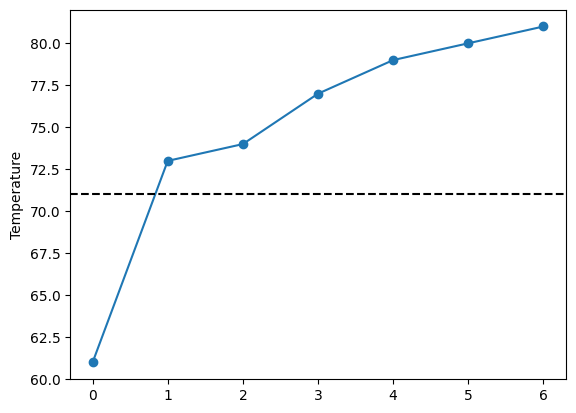

In [26]:
# Plotting the midpoint temperature
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')
plt.show()

The median temperature is 77 degrees


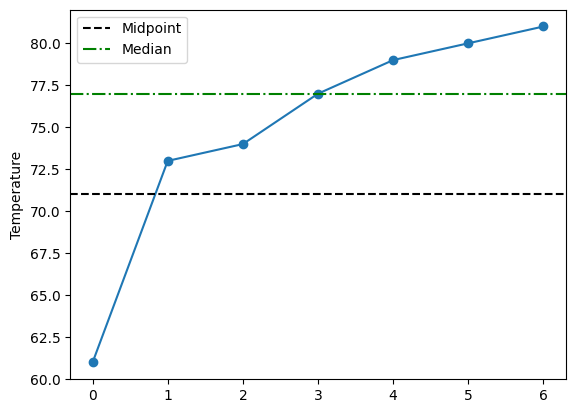

In [27]:
# Plotting the median temperature
median = measurements[3]
print(f'The median temperature is {median} degrees')
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='Midpoint')
plt.axhline(median, color='g', linestyle='-.', label='Median')
plt.legend()
plt.ylabel('Temperature')
plt.show()

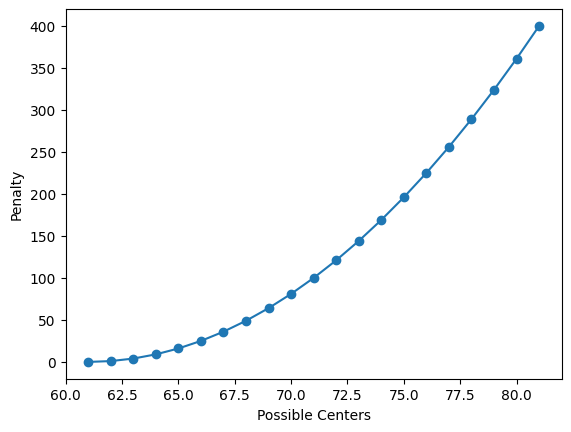

In [28]:
# The median split is not well-balanced, since it's closer to the upper three temps in the plot.
# Balance the split by penalizing the median from being too far from the minimum. 
# Implement the penalty using squared distance. 
# If we penalize our central value based on its distance from 61, the squared penalty grows noticeably for higher values. 

def squared_distance(value1, value2): return (value1 - value2) ** 2 

possible_centers = range(measurements.min(), measurements.max() + 1) # Min and max measured temps
penalties = [squared_distance(center, measurements.min()) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

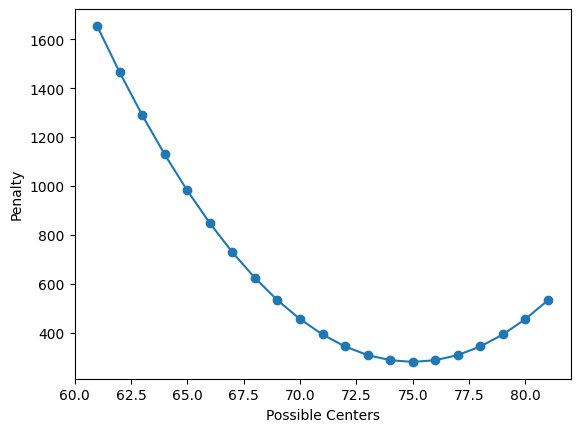

In [29]:
# As centers shift toward 61, the penalty drops but the distance to the remaining measurements increases. 
# We ought to penalize each potential center based on its squared distance to all seven measurements. 
# Therefore, we penalize based on total sum of squared distances

def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distances(center, measurements) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

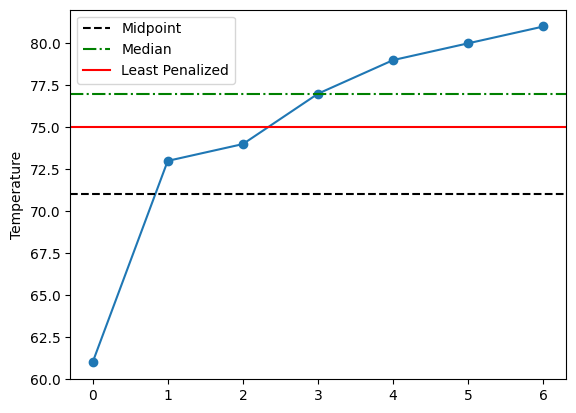

In [32]:
# We can call 75 the "least-penalized center". 
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)] # np.argmin returns the index of the minimum value in an array

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='Midpoint')
plt.axhline(median, color='g', linestyle='-.', label='Median')
plt.axhline(least_penalized, color='r', linestyle='-', label='Least Penalized')
plt.legend()
plt.ylabel('Temperature')
plt.show()

In [35]:
# Sum-of-squared-distances error is always minimized by the average value of a dataset. 
# Compute the least-penalized center using the arithmetic mean. 

assert measurements.sum() / measurements.size == least_penalized

In [36]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

In [39]:
# `np.average` is different from `np.mean` because it takes an optional `weights` parameter. 
# `weights` is a list of numeric weights that capture the importance of the measurements relative to each other.

equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)

In [42]:
# `weights` is useful for computing the mean across duplicate measurements
# For example, 10 temp measurements where 75 degrees appears 9 times and 77 appears once. 

weighted_mean = np.average([75, 77], weights=[9, 1])
print(f'The weighted mean is {weighted_mean} degrees')
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

The weighted mean is 75.2 degrees


In [43]:
# Computing the weighted mean of relative weights
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])
assert weighted_mean == np.average([75, 77], weights=[900, 100])

### Finding the mean of a probability distribution
How does the peak compare to the distribution's mean?

The mean of the binomial distribution is 10.00 heads


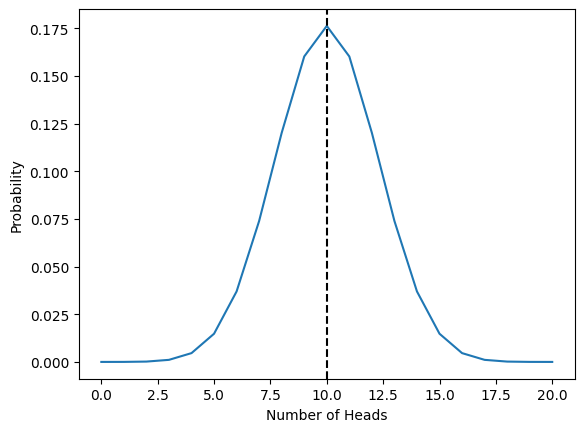

In [44]:
num_flips = 20
interval_all_counts = range(num_flips + 1) # I think this interval will be useful in the card-flip exercise
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f'The mean of the binomial distribution is {mean_binomial:.2f} heads')
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='k', linestyle='--', label='Mean')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

In [46]:
# Calculating the binomial mean with SciPy
assert stats.binom.mean(num_flips, prob_head) == 10

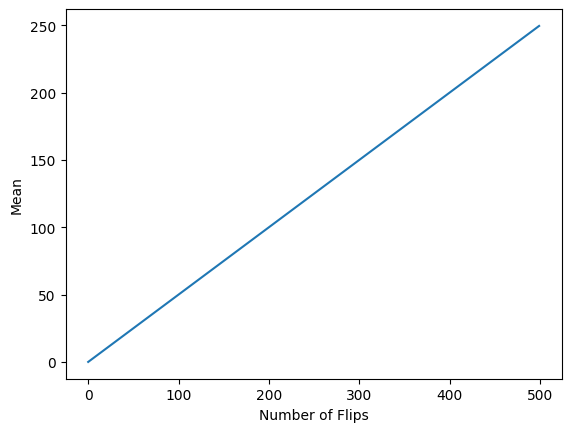

In [47]:
# Plotting multiple binomial means
means = [stats.binom.mean(n, prob_head) for n in range(500)]
plt.plot(range(500),means)
plt.xlabel('Number of Flips')
plt.ylabel('Mean')
plt.show()

In [48]:
# The mean is equal to half the coin-flip count. 
# Consider the mean of a single coin flip, also called the Bernoulli distribution.
num_flips = 1
assert stats.binom.mean(num_flips, prob_head) == 0.5

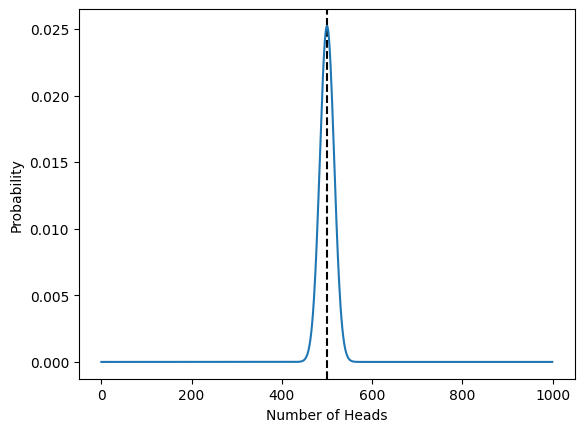

In [49]:
# Confirm the linear relationship with the mean of a 1000 coin flips' distribution
num_flips = 1000
assert stats.binom.mean(num_flips, prob_head) == 500

interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
plt.axvline(500, color='k', linestyle='--', label='Mean')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

## Variance as a measure of dispersion
*Dispersion* is the scattering of data points around some central value. A smaller dispersion indicates more predictable data.

In [51]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

print(f'Mean California temperature: {california.mean()}')
print(f'Mean Kentucky temperature: {kentucky.mean()}')

Mean California temperature: 75.0
Mean Kentucky temperature: 75.0


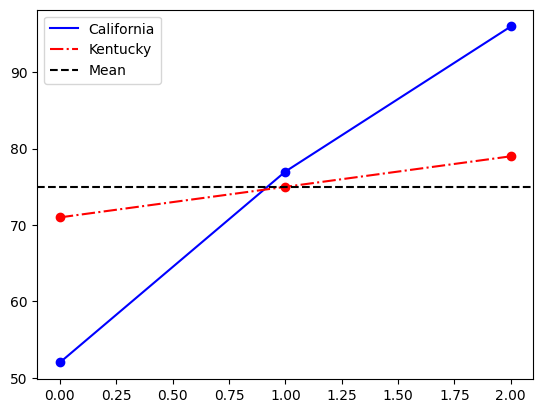

In [52]:
# The means are the same. You already knew this: remember Anscombe's quartet.
# Let's visualize the differences

plt.plot(range(3), california, color = 'b', label='California')
plt.scatter(range(3), california, color = 'b')
plt.plot(range(3), kentucky, color = 'r', linestyle='-.', label='Kentucky')
plt.scatter(range(3), kentucky, color = 'r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [53]:
# California's temperatures have a much higher dispersion than Kentucky's. 
# Compute the sum of squares for California's temperatures

def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)

california_sum_squares = sum_of_squares(california)
print(f'Sum of squares for California: {california_sum_squares}')

Sum of squares for California: 974.0


In [54]:
# Compare to Kentucky's sum of squares
kentucky_sum_squares = sum_of_squares(kentucky)
print(f'Sum of squares for Kentucky: {kentucky_sum_squares}')

Sum of squares for Kentucky: 32.0


In [55]:
# Sum of squares is not perfect. If you duplicate the data, the sum of squares doubles despite constant dispersion.

california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f'Sum of squares for California (duplicated): {duplicated_sum_squares}')
assert duplicated_sum_squares == california_sum_squares * 2

Sum of squares for California (duplicated): 1948.0


In [56]:
# The takeaway: sum of squares is sensitive to the number of data points.
# However, this is easy to eliminate by dividing the sum of squares by the number of data points.

value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2

In [57]:
# Dividing the sum of squares by the number of data points gives us the variance.
# The variance is the average squared distance from the mean.

def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])

assert variance(california) == california_sum_squares / california.size

In [58]:
# Compare the variance between the California and Kentucky temperatures
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f'California variance: {california_variance}')
print(f'Kentucky variance: {kentucky_variance}')

California variance: 324.6666666666667
Kentucky variance: 10.666666666666666


In [59]:
# Variance is a good measure of dispersion. That's why NumPy has a built-in variance function.

assert california_variance == california.var()
assert california_variance == np.var(california)

In [60]:
# Recall that variance depends on the mean. A weighted mean requires a weighted variance.
# This is not difficult to do if you remember that np.average takes a `weights` parameter.

def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

### Finding the variance of a probability distribution

In [61]:
# Computing the variance of a binomial distribution
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f'The variance of the binomial distribution is {variance_binomial:.2f} heads')

The variance of the binomial distribution is 5.00 heads


In [63]:
# SciPy's stats.binom.var method computes the variance of a binomial distribution
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2
assert stats.binom.var(20, prob_head) == 5.0

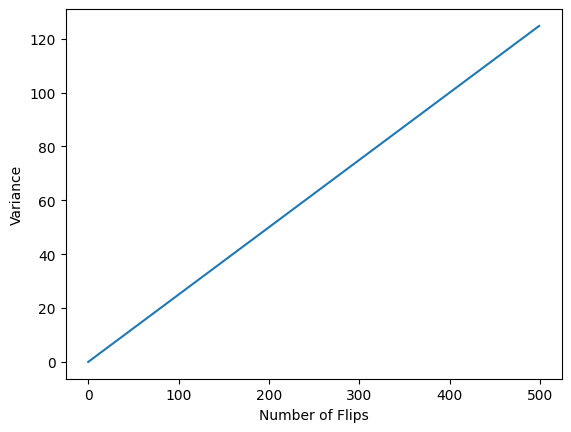

In [64]:
# Plotting the variance of a binomial distribution across a range of coin flips
variances = [stats.binom.var(num_flips, prob_head) for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Number of Flips')
plt.ylabel('Variance')
plt.show()

In [65]:
# The binomial variance is linearly related to the coin-flip count, like its mean.
# Thus the variance of a single coin flip, the Bernoulli distribution, is 0.25.

assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

In [70]:
# Standard deviation is the square root of variance. It is an alternative measure of dispersion.
# Standard deviation allows us to look at variance in the original units of the data.

data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)

# Making predictions using the central limit theorem and SciPy
Covers:
- Analyzing the normal curve using the SciPy library
- Predicting mean and variance using the central limit theorem
- Predicting population properties using the central limit theorem

Summary:
- A normal distribution's mean and standard deviation are determined by the position of its peak. The mean is equal to the x coordinate of the peak. The standard deviation is equal to the inverse of the y coordinate multiplied by the square root of 2*pi.
- A probability density function maps inputted float values to their likelihood weights. Taking the area underneath that curve produces a probability.
- Repeatedly sampling the mean from almost any distribution produces a normal curve. The mean of the normal curve approximates the mean of the underlying distribution. Also, the variance of the normal curve multiplied by the sample size approximates the variance of the underlying distribution.
- The *standard error of the mean* (SEM) equals the population standard deviation divided by the square root of the sample size. Consequently, dividing the population variance by the sample size and subsequently taking the square root also generates the SEM. The SEM, coupled with the population mean, allows us to compute the probability of observing certain sample combinations.
- The *trapezoidal rule* allows us to estimate the area under a curve by decomposing that curve into trapezoidal units. Then we simply sum over the areas of each trapezoid.
- A *survival function* measures a distribution's area over an interval that's greater than some x.
- We must cautiously consider our assumptions while making inferences from limited data.

In [74]:
# Computing head-count frequencies from the mean

np.random.seed(0)
sample_size = 100000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)]) # _ is a throwaway variable
head_count = sample.sum() # sum of 1s is the number of heads
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

In [75]:
# Alternatively, compute all 100000 head-count frequencies at once
# Create an array of sample means

np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

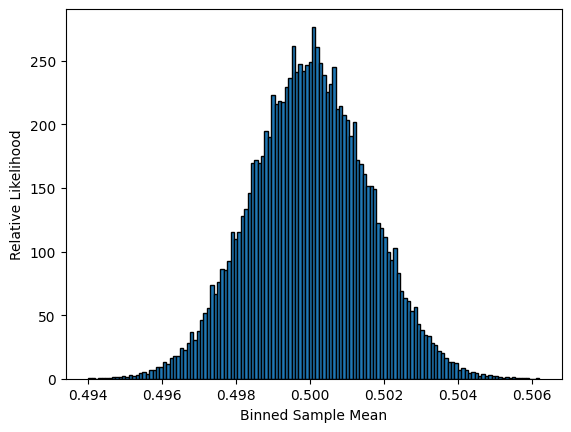

In [77]:
# Visualizing sample means in a histogram

sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor = 'black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [82]:
# Computing the mean and standard deviation of a histogram

mean_normal = np.average(bin_edges[:-1], weights=likelihoods) # bin_edges[:-1] is a slice of all items except the last in the list
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f'Mean is approximately {mean_normal:.2f}')
print(f'Standard deviation is approximately {std_normal:.4f}')

Mean is approximately 0.50
Standard deviation is approximately 0.0016


In [85]:
# Computing the mean and standard deviation from peak coordinates

import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f'Mean is approximately {peak_x_value:.2f}')
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2 * math.pi) ** 0.5) ** -1
print(f'Standard deviation is approximately {std_from_peak:.4f}')

Mean is approximately 0.50
Standard deviation is approximately 0.0014


In [86]:
# Computing the mean and standard deviation by calling `stats.norm.fit(sample_means)`

fitted_mean, fitted_standard_deviation = stats.norm.fit(sample_means)
print(f'Mean is approximately {fitted_mean:.2f}')
print(f'Standard deviation is approximately {fitted_standard_deviation:.4f}')

Mean is approximately 0.50
Standard deviation is approximately 0.0016


In [ ]:
# p.98